In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\fabri\Desktop\MarcoPatierno_DepositoCorsoPython\CorsoPython\Giorno 18 28-04\train (2).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


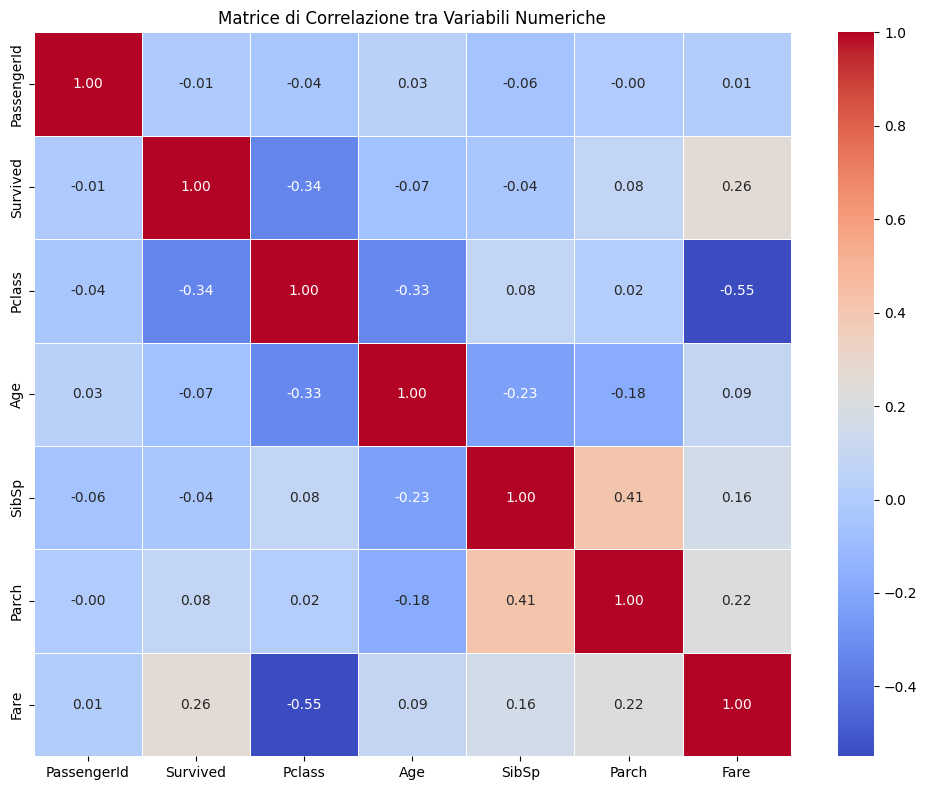

In [3]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

numeric_df = df.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_df.corr()

# Visualizza la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione tra Variabili Numeriche')
plt.tight_layout()
plt.show()

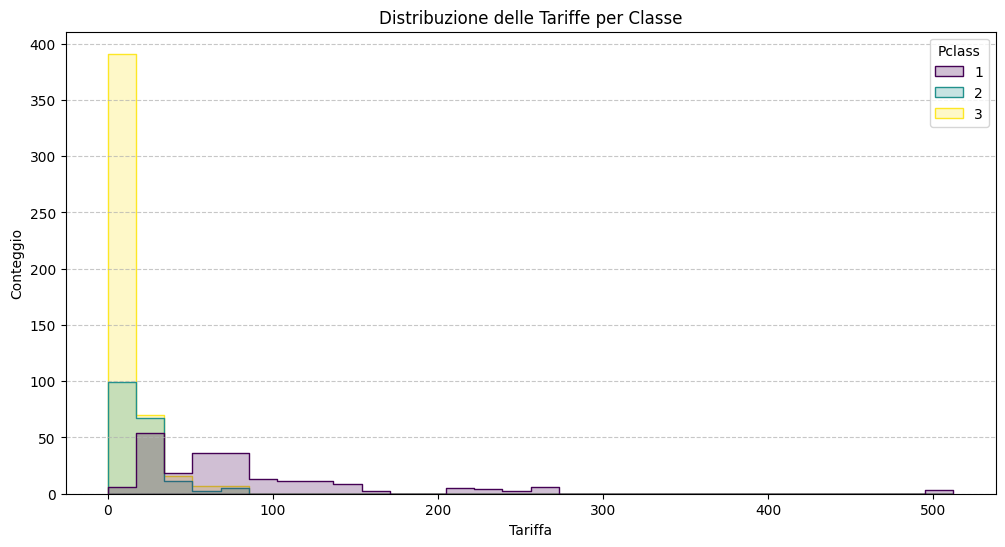

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Fare', hue='Pclass', bins=30, palette="viridis",
             element='step', common_norm=False)
plt.title('Distribuzione delle Tariffe per Classe')
plt.xlabel('Tariffa')
plt.ylabel('Conteggio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

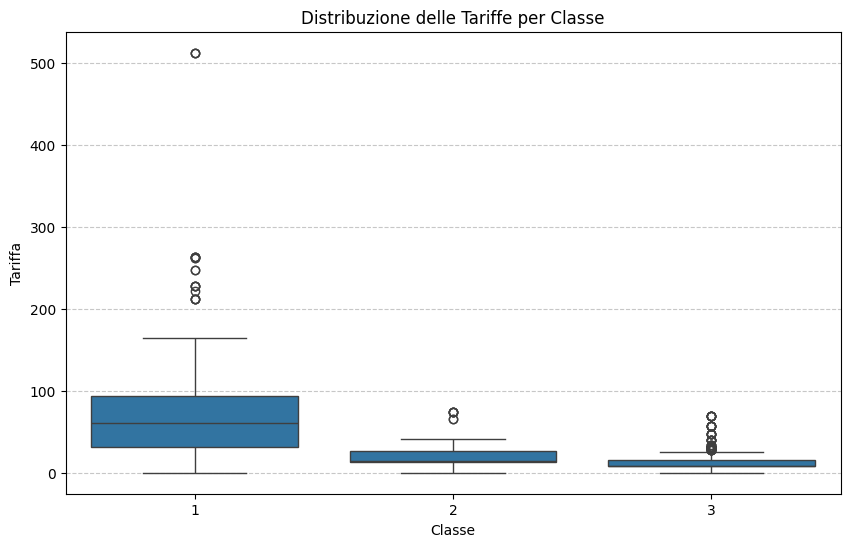

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Distribuzione delle Tariffe per Classe')
plt.xlabel('Classe')
plt.ylabel('Tariffa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# È utile creare una features "IsALone"
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)  # 1 se viaggiava solo, 0 altrimenti

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64


C:\Users\fabri\AppData\Local\Temp\ipykernel_5832\341453754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FamilySize', data=df, palette='viridis')


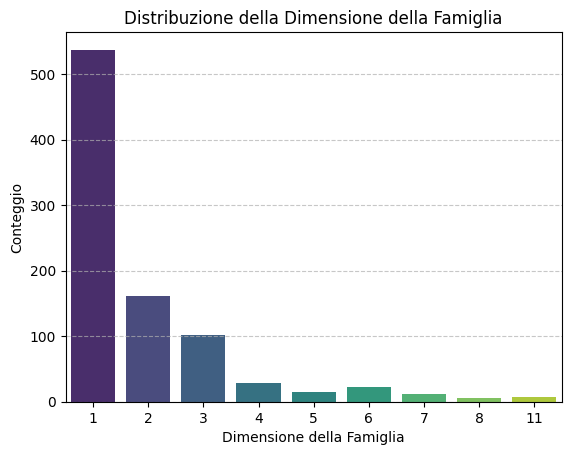

In [8]:
num_family = df["FamilySize"].value_counts()
print(num_family)
sns.countplot(x='FamilySize', data=df, palette='viridis')
plt.title('Distribuzione della Dimensione della Famiglia')
plt.xlabel('Dimensione della Famiglia')
plt.ylabel('Conteggio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



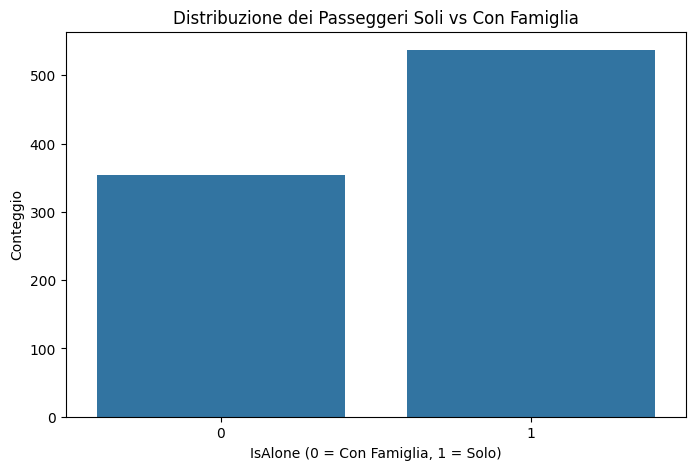

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='IsAlone', data=df)
plt.title('Distribuzione dei Passeggeri Soli vs Con Famiglia')
plt.xlabel('IsAlone (0 = Con Famiglia, 1 = Solo)')
plt.ylabel('Conteggio')
plt.show()

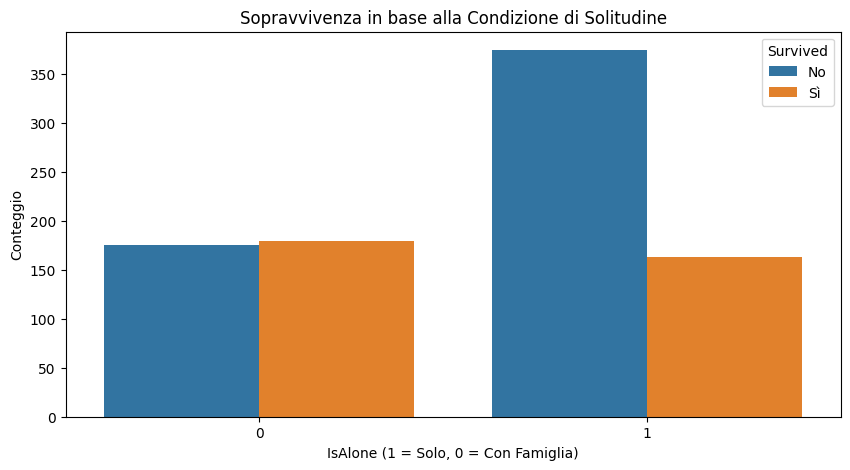

In [10]:
# relazione tra IsAlone e sopravvivenza
plt.figure(figsize=(10, 5))
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title('Sopravvivenza in base alla Condizione di Solitudine')
plt.xlabel('IsAlone (1 = Solo, 0 = Con Famiglia)')
plt.ylabel('Conteggio')
plt.legend(title='Survived', labels=['No', 'Sì'])
plt.show()


In [11]:
survival_alone = df.groupby('IsAlone')['Survived'].mean() * 100
print("Percentuale di sopravvivenza:")
print(f"Passeggeri soli: {survival_alone[1]:.1f}%")
print(f"Passeggeri con famiglia: {survival_alone[0]:.1f}%")


Percentuale di sopravvivenza:
Passeggeri soli: 30.4%
Passeggeri con famiglia: 50.6%


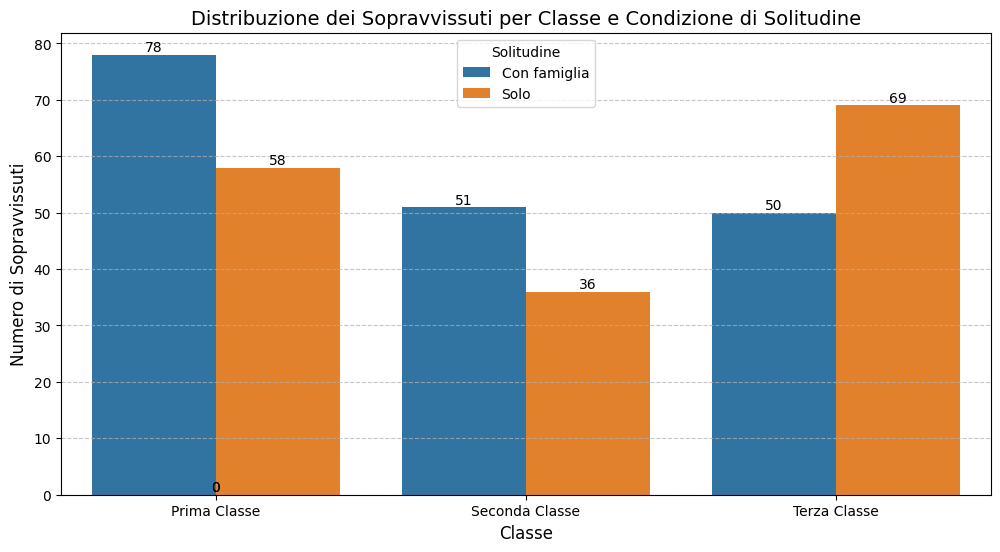

In [12]:
# solo sopravissuti
survivors = df[df['Survived'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=survivors, x='Pclass', hue='IsAlone')

plt.title('Distribuzione dei Sopravvissuti per Classe e Condizione di Solitudine', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Numero di Sopravvissuti', fontsize=12)
plt.xticks([0, 1, 2], ['Prima Classe', 'Seconda Classe', 'Terza Classe'])
plt.legend(title='Solitudine', labels=['Con famiglia', 'Solo'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', 
                      (p.get_x() + p.get_width()/2, height), 
                      ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
survivors_by_alone = survivors['IsAlone'].value_counts().sort_index()


survivors_by_alone.index = ['Con famiglia', 'Solo']

print("Conteggio dei sopravvissuti:")
print(survivors_by_alone)
print(f"Totale sopravvissuti: {len(survivors)}")

#percentuali
survivors_percent = survivors_by_alone / len(survivors) * 100
print("\nPercentuale sul totale dei sopravvissuti:")
for status, percentage in survivors_percent.items():
    print(f"{status}: {percentage:.1f}%")
    

Conteggio dei sopravvissuti:
Con famiglia    179
Solo            163
Name: count, dtype: int64
Totale sopravvissuti: 342

Percentuale sul totale dei sopravvissuti:
Con famiglia: 52.3%
Solo: 47.7%


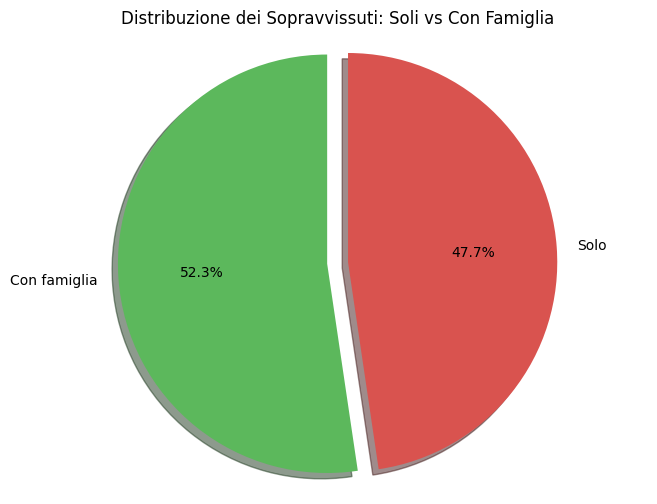

In [14]:
plt.figure(figsize=(8, 6))
plt.pie(survivors_by_alone, labels=['Con famiglia', 'Solo'], autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=(0, 0.1), colors=['#5cb85c', '#d9534f'])
plt.axis('equal')
plt.title('Distribuzione dei Sopravvissuti: Soli vs Con Famiglia')
plt.show()

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,1


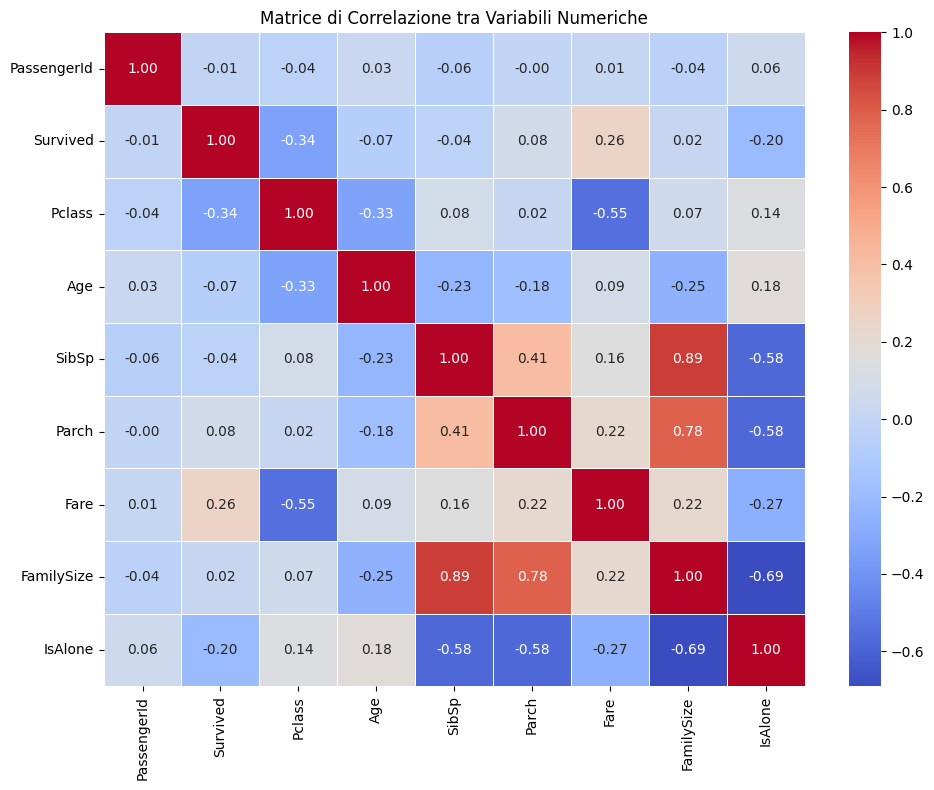

In [20]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


correlation_matrix = numeric_df.corr()

# Visualizza la matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione tra Variabili Numeriche')
plt.tight_layout()
plt.show()

In [26]:
# Il nome delle famiglie da più di 8 persone
# Estrai i cognomi (se non l'hai già fatto)
df['Surname'] = df['Name'].str.split(',').str[0]

# Filtra le righe dove FamilySize > 8
large_families_by_size = df[df['FamilySize'] > 8]

# Verifica se ci sono risultati
if len(large_families_by_size) > 0:
    # Prendi solo il primo cognome trovato
    first_surname = large_families_by_size['Surname'].iloc[0]
    max_size = large_families_by_size[large_families_by_size['Surname'] == first_surname]['FamilySize'].max()
    
    print(f"Prima famiglia con FamilySize > 8:")
    print(f"Cognome: {first_surname} (FamilySize massimo: {max_size})")
    
    # Mostra i dettagli dei membri di questa famiglia
    members = df[df['Surname'] == first_surname]
    print(f"\nDettagli della famiglia {first_surname}:")
    print(members[['Name', 'Age', 'Sex', 'Survived', 'Pclass', 'FamilySize']])
else:
    print("Non ci sono famiglie con FamilySize > 8")
    
    # Proviamo con una soglia più bassa se necessario
    threshold = 6
    large_families_by_size = df[df['FamilySize'] > threshold]
    if len(large_families_by_size) > 0:
        first_surname = large_families_by_size['Surname'].iloc[0]
        max_size = large_families_by_size[large_families_by_size['Surname'] == first_surname]['FamilySize'].max()
        print(f"\nPrima famiglia con FamilySize > {threshold}:")
        print(f"Cognome: {first_surname} (FamilySize massimo: {max_size})")
        
        members = df[df['Surname'] == first_surname]
        print(f"\nDettagli della famiglia {first_surname}:")
        print(members[['Name', 'Age', 'Sex', 'Survived', 'Pclass', 'FamilySize']])

Prima famiglia con FamilySize > 8:
Cognome: Sage (FamilySize massimo: 11)

Dettagli della famiglia Sage:
                                  Name        Age     Sex  Survived  Pclass  \
159         Sage, Master. Thomas Henry  29.699118    male         0       3   
180       Sage, Miss. Constance Gladys  29.699118  female         0       3   
201                Sage, Mr. Frederick  29.699118    male         0       3   
324           Sage, Mr. George John Jr  29.699118    male         0       3   
792            Sage, Miss. Stella Anna  29.699118  female         0       3   
846           Sage, Mr. Douglas Bullen  29.699118    male         0       3   
863  Sage, Miss. Dorothy Edith "Dolly"  29.699118  female         0       3   

     FamilySize  
159          11  
180          11  
201          11  
324          11  
792          11  
846          11  
863          11  
